Hospitality industry is one of the most challenging sector. There are thousands of restaurents all over Bengaluru but only a few stand apart.
Let's suppose you need to open up a restaurent.There a lot of factor that determine the success of the restaurent.Factors like the locality,cost,cuisine etc. 
Let's analyse the factors that matter the most and also the factors that one should be cautious before opening a restaurent.

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


: 

Let's load the dataset.

In [164]:
df = pd.read_csv("zomato.csv")
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


We almost have fifty thousand rows. These restaurants are enough to give us insights about the factors influencing the success of a restaurent. 
Here a good rating is considered as a parameter to judge the success of the restaurent.

Let's see the columns that are present in the dataset.

In [165]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

So there are some columns present which aren't necessary for our analysis such as url,phone number etc.

In [166]:
df.drop(columns=['url','phone'],inplace=True)

Let's check for missing values before proceeding with analysis.

In [167]:
df.isnull().sum()


address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

As you can see in the dish_liked column about 28078 values are missing. That's about 50 percent of data.This attribute is specific to particular restaurant and hence won't help us with analysis.So we are gonna remove that column as it does not make sense to fill those values.

In [168]:
df.drop(columns=['dish_liked'],inplace=True)

Before starting, let's look at the various restaurants in Banglore.

In [169]:
len(df['name'].value_counts())

8792

There are almost 8800 unique restaurants in Banglore.Let's look at the top 10 most restaurant with highest presence.

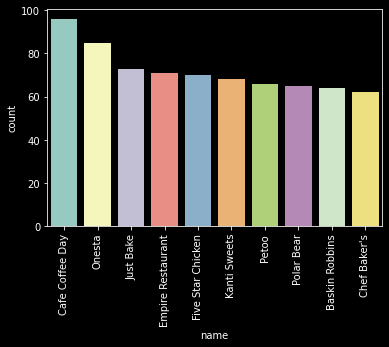

In [170]:
chart=sns.countplot(df['name'], order=pd.value_counts(df['name']).iloc[:10].index,orient="h")
x=chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


As we can see there are a lot of fastfood chains in Banglore.Since it is a IT hub, fast food chains are usually common.

In [171]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [172]:
df['rate'].isnull().sum()

7775

There are 7775 restaurants whose rating is not avaiable. We won't be deleting these because we need to understand the distribution of restaurants across Banglore.

There are some restaurent whose rating is 'NEW'.These are the restaurants that were just listed on zomato. We will be converting them to nan

In [173]:
for val in range(len(df)):
    if (df['rate'][val] == '-' or df['rate'][val] == 'NEW' or pd.isna(df['rate'][val])):
        df['rate'][val]=np.nan
    else:
        df['rate'][val]=df['rate'][val][:3]
  




So let's check the distribution of online delivery service by the restaurants. 

In [174]:
fig = px.pie(df, names='online_order', title='Online order')
fig.show()


As we see 58% of the restaurant provide with online delivery.Now we need to check if online delivery has any influence on rating of the restaurant.

In [175]:
df['rate']=df['rate'].astype('float')

In [176]:
df.groupby(by=['online_order'])['rate'].mean().values


array([3.65907048, 3.7224399 ])

In [177]:
df['approx_cost(for two people)'].isnull().sum()

346

In [178]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [179]:

fig = px.bar(df, x=df.groupby(by=['online_order'])['rate'].mean().index, y=df.groupby(by=['online_order'])['rate'].mean().values,
              title="Long-Form Input")
fig.show()


As you see the restaurants who provide online delivery are slightly better(approx 0.1) than restaurants who do not provide online delivery.

Now let's check which localities have most restaurants.

In [180]:
df['location'].nunique()

93

There are a total of 93 unique locations in out dataframe. 

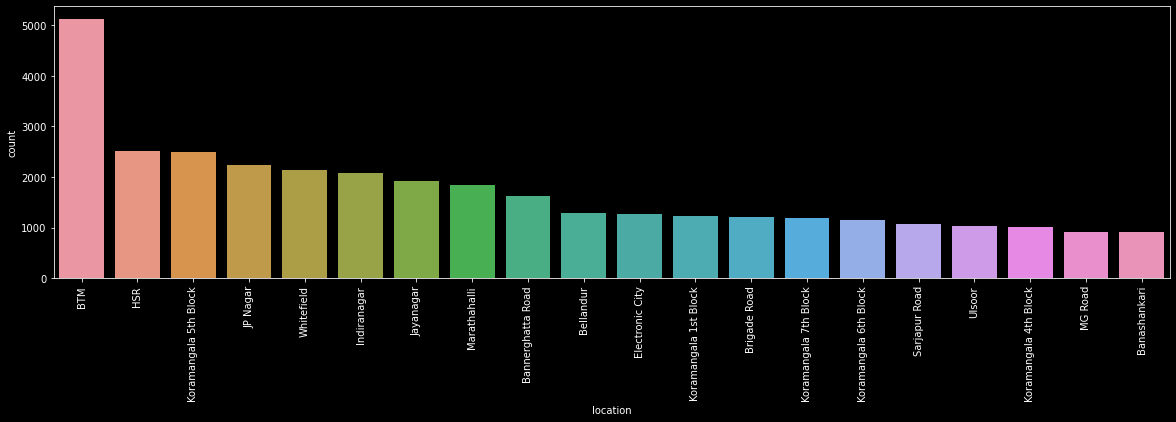

In [181]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 5))
chart = sns.countplot(df['location'], order=pd.value_counts(df['location']).iloc[:20].index, orient="v",ax=ax)
x = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


As we can see BTM has the highest number of restaurants (a little over 5000). So should we think of opening restaurant over there? Well let's analyse further.

Let's check the the type of restaurants at various locations.

In [182]:
df.head(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [183]:
df.groupby(['location'])['rest_type'].value_counts()


location     rest_type                
BTM          Quick Bites                  2733
             Casual Dining                 711
             Takeaway, Delivery            334
             Cafe                          291
             Delivery                      254
                                          ... 
Yeshwantpur  Food Court                      2
             Quick Bites, Sweet Shop         2
             Food Court, Beverage Shop       1
             Food Court, Quick Bites         1
             Sweet Shop                      1
Name: rest_type, Length: 1422, dtype: int64

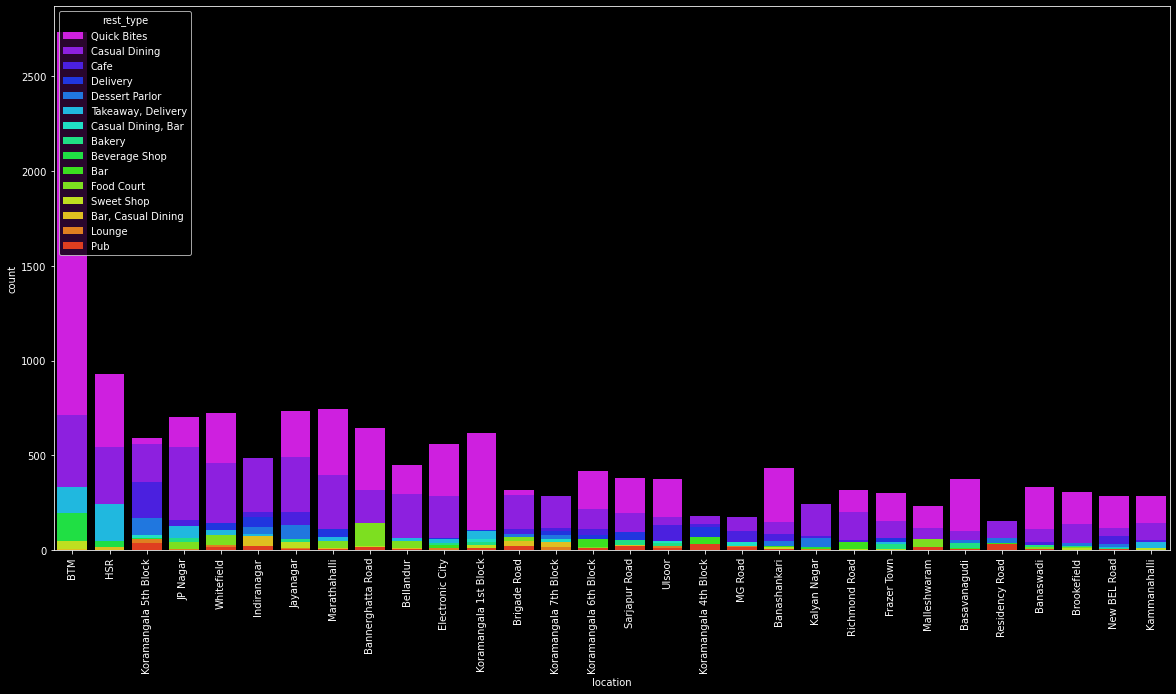

In [184]:
fig, ax = plt.subplots(figsize=(20, 10))

chart = sns.countplot(df['location'], hue=df['rest_type'], order=pd.value_counts(
    df['location']).iloc[:30].index, hue_order=pd.value_counts(df['rest_type']).iloc[:15].index, dodge=False, palette='gist_rainbow_r')
x = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
# chart.legend("upper right")

So after analysing the top 20 locations with top 20 restaurant types, we can see that almost all the locations have a majority of quick bite restaurant followed by casual dining.

Now what is the distribution of cost with respect to the restaurant type?Before proceeding we to do a little bit of processing to the cost attribute.


In [185]:
def cost(x):
    if pd.isna(x):
        pass
    else:
        return "".join(x.split(','))


df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(cost)


In [186]:


def convert(x):
    if pd.isna(x):
        pass
    else:
        return int(x)



df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(convert)
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean(),inplace=True)

In [187]:
df.dropna(inplace=True)

In [188]:
df['rest_type'].unique()


array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [189]:
df.groupby(['rest_type'])['approx_cost(for two people)'].mean()

rest_type
Bakery                        370.315513
Bakery, Beverage Shop         178.125000
Bakery, Cafe                  628.846154
Bakery, Dessert Parlor        357.142857
Bakery, Food Court            500.000000
                                 ...    
Sweet Shop                    257.905983
Sweet Shop, Dessert Parlor    100.000000
Sweet Shop, Quick Bites       260.112360
Takeaway                      301.431052
Takeaway, Delivery            393.646223
Name: approx_cost(for two people), Length: 93, dtype: float64

In [190]:
fig = px.bar(df, x=df.groupby(by=['rest_type'])['approx_cost(for two people)'].mean().index, y=df.groupby(by=['rest_type'])['approx_cost(for two people)'].mean().values,
             title="Cost w.r.t. restaurant type")
fig.show()


The most expensive type of restaurant is Fine Dining and MicroBrewery.The most common type of restaurant i.e. Quick Bites costs around three hundered ruppees for 2 people.

Let's check if there is any relation between cuisines and cost too.

In [191]:
df['cuisines'].nunique()

2712

In [192]:
df1=df.copy()

In [193]:
df['cuisines'].isnull().sum()

0

Let's check the the type of cuisines offered to understand the preference of people in various cities.

In [194]:
df['cuisines'] = df['cuisines'].apply(
    lambda x: x.split(','))


In [195]:
len(df1['cuisines'].unique())

2712

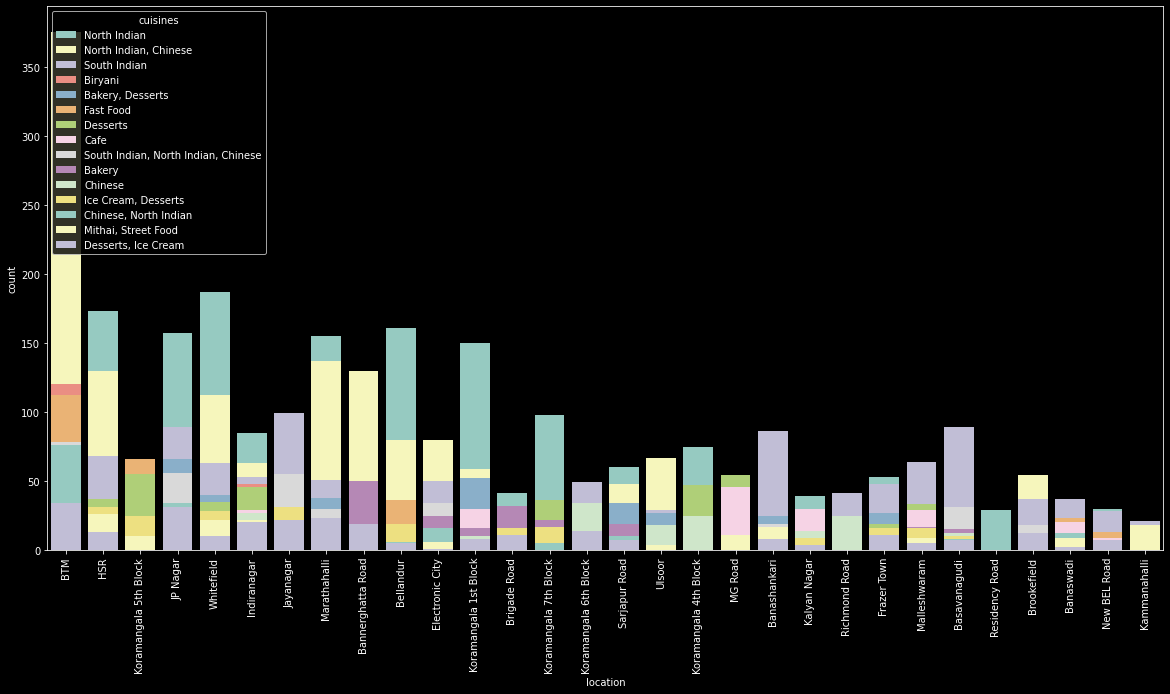

In [196]:
fig, ax = plt.subplots(figsize=(20, 10))

chart = sns.countplot(df1['location'], hue=df1['cuisines'], order=pd.value_counts(
    df1['location']).iloc[:30].index, hue_order=pd.value_counts(df1['cuisines']).iloc[:15].index, dodge=False, palette="Set3")
x = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
# chart.legend("upper right")


As we can see the most popular cuisine offered at top 15 locations are chinese and north indian.

Now let's analyse the rating of the restaurant with respect to the number of cuisines offered

In [197]:
c=round(df1.groupby(['cuisines'])['rate'].mean(),2).to_dict()
d=dict(sorted(c.items(),key=lambda x:x[1],reverse=True))

In [198]:
fig = px.bar(df, x=d.keys(), y=d.values(),
             title="Rating w.r.t. cuisine offered")
fig.show()


As we can see the restaurant that offers Cantonese has the highest rating.